# Информация по датасету 📝

Собранные данные по 4 компаниям: Red, Black, Green и Blue
По компаниям предоставлены следующие данные:
- `HID` - human_id, зашифрованный персональный идентификатор пользователя компании
- `has_*company*_id` - наличие зарегистрированного аккаунта в компании
- `*company*_gmv_total` - суммарный **gmv** пользователя в сервисе
- `*company*_gvm_order_count` - количество успешных заказов пользователя в сервисе
- `*company*_activity_count` - количество активных действий пользователя в сервисе
- `*company*_android` - установленное у пользователя приложение компании на платформе **android**
- `*company*_apple` - установленное у пользователя приложение компании на платформе **Apple**
- `*company*_web` - установленное у пользователя приложение компании на **ПК**
- `is_msk -` территориальное расположение в **Москве**

# 1.0 Работа с датасетом и описание ноутбука 📃

---

### 1.1 Загрузка датасета

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

sns.set_style('darkgrid')

Так как расширение файла **.xlsx**, а не **.csv**, то требуется проверить формат данных в Excel таблице. Данные должны храниться в подобном формате, а также иметь тип данных **общий** для корректной работы в `pandas`.

<center>

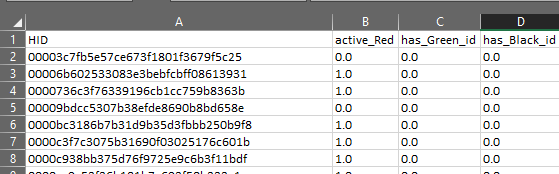

</center>

Проведя указанную выше обработку, приступим к загрузке датасета.

In [48]:
df = pd.read_excel('./input/Analytic_test.xlsx', index_col='HID')

df.head()

,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,Black_gvm_total,Black_gvm_order_count,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
HID,,,,,,,,,,,,,,,,,,,,,
00003c7fb5e57ce673f1801f3679f5c25,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00006b602533083e3bebfcbff08613931,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0000736c3f76339196cb1cc759b8363b,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
00009bdcc5307b38efde8690b8bd658e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0000bc3186b7b31d9b35d3fbbb250b9f8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Проверим значения колонок на наличие в нашем датафрейме. Переведём в `pd.Series` для удобства.

In [49]:
pd.Series(df.columns)

0                active_Red
1              has_Green_id
2              has_Black_id
3               has_Blue_id
4       Blue_activity_count
5            Blue_gmv_total
6           Green_gvm_total
7     Green_gvm_order_count
8           Black_gvm_total
9     Black_gvm_order_count
10              Red_android
11            Green_android
12            Black_android
13             Blue_android
14                Red_apple
15              Green_apple
16              Black_apple
17               Blue_apple
18                   is_msk
19                  Red_web
20                Green_web
21                Black_web
22                 Blue_web
dtype: object

Видим, что отсутствуют некоторые колонки, которые были бы полезны для анализа, а именно:

Название|Red|Green|Black|Blue|
|---|---|---|---|---|
|active_*company*|✅|❌|❌|❌|
|has_*company*_id|❌|✅|✅|✅|
|*company*_activity_count|❌|❌|❌|✅|
|*company*_gmv_total|❌|✅|✅|✅|
|*company*_gmv_order_count|❌|✅|✅|❌|
|*company*_android|✅|✅|✅|✅|
|*company*_apple|✅|✅|✅|✅|
|*company*_web|✅|✅|✅|✅|

Также, присутствует колонка `is_msk`, не зависящая от компаний.\
Помимо этого, в названиях колонок перемешаны `gmv` и `gvm`.\
Существует лишь метрика `GMV` **(Gross Merchandise Volume)**, что требуется исправить.

### 1.2 Исправим несоответствия

In [50]:
# Заменим все вхождения 'gvm' на 'gmv' в колонках
df.columns = pd.Index([df.columns.values[x].replace('gvm', 'gmv') for x in range(df.columns.shape[0])])

df.head()

,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gmv_total,Green_gmv_order_count,Black_gmv_total,Black_gmv_order_count,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
HID,,,,,,,,,,,,,,,,,,,,,
00003c7fb5e57ce673f1801f3679f5c25,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00006b602533083e3bebfcbff08613931,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0000736c3f76339196cb1cc759b8363b,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
00009bdcc5307b38efde8690b8bd658e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0000bc3186b7b31d9b35d3fbbb250b9f8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Проверим датасет на пропущенные значения

In [51]:
# Проверим датасет на суммарное количество пропущенных значений
nans = df.isna().sum()
# Отфильтруем лишь те, где они есть
display(nans[nans > 0])

del nans

Blue_gmv_total    1
dtype: int64

Присутствует лишь одно пропущенное значение, поэтому выкинем его при помощи метода `.dropna()`

In [52]:
# Дропнем пропущенные значения из пункта выше
df = df.dropna()

### 1.3 Описание ноутбука

В данном анализе я использовал метод написания функций для последующего вывода графиков. Удобство заключается в том, что в любой ячейке после объявления функции достаточно передать датасет со значениями в функцию и вывести график без надобности его редактирования. Все функции расчитаны на то, что датасет будет первоначально обработан так же, как было указано выше.

# 2.0 Пользователи и устройства 📱💻

---

### 2.1 Распределение пользователей по устройствам (`draw_devices`)

Для начала построим **график распределения пользователей по их устройствам**, дополнительно выведя датафрейм с таблицей значений.

In [53]:
def draw_devices(data: pd.DataFrame) -> None:
    print('Суммарное количество пользователей компаний по платформам:')
    col_names = ['Red', 'Green', 'Black', 'Blue']
    # Снизу более умный код для автоматического "доставания" названий компаний
    # col_names = data.iloc[:, 14:18].columns
    # col_names = [col_names[x].rstrip('apple')[:-1] for x in range(col_names.shape[0])]
    x_axis = np.arange(len(col_names))
    
    # Получим данные из колонок company_android, company_apple
    # и company_web соответственно
    devices_android = data.iloc[:, 10:14].sum()
    devices_apple = data.iloc[:, 14:18].sum()
    devices_web = data.iloc[:, 19:24].sum()
    
    # Выведем полный датафрейм со значениями об устройствах перед графиком
    display(pd.DataFrame(
        {
            'Apple': devices_apple.values,
            'Android': devices_android.values,
            'Desktop': devices_web.values,
            'Sum': devices_apple.values + devices_android.values + devices_web.values
        },
        index=col_names,
        dtype=np.int32
        ))
    
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1,1,1)
    # Пример оформления barchart через matplotlib.pyplot.bar
    plt.bar(x_axis - 0.2, devices_apple, 0.2, label='Пользователи Apple')
    plt.bar(x_axis, devices_android, 0.2, label='Пользователи Android')
    plt.bar(x_axis + 0.2, devices_web, 0.2, label='Пользователи PC', color='grey')
    
    # Устанавливаем параметры нашего графика
    plt.title('Установленные приложения')
    plt.xticks(x_axis, col_names)
    plt.xlabel("Компании")
    plt.ylabel("Количество пользователей")
    plt.legend()
    
    fig.tight_layout()
    plt.savefig('./output/draw_devices.png')
    plt.show()

Суммарное количество пользователей компаний по платформам:


,Apple,Android,Desktop,Sum
Red,10874,32133,67108,110115
Green,616,546,198,1360
Black,1782,1077,1461,4320
Blue,4646,8047,10640,23333


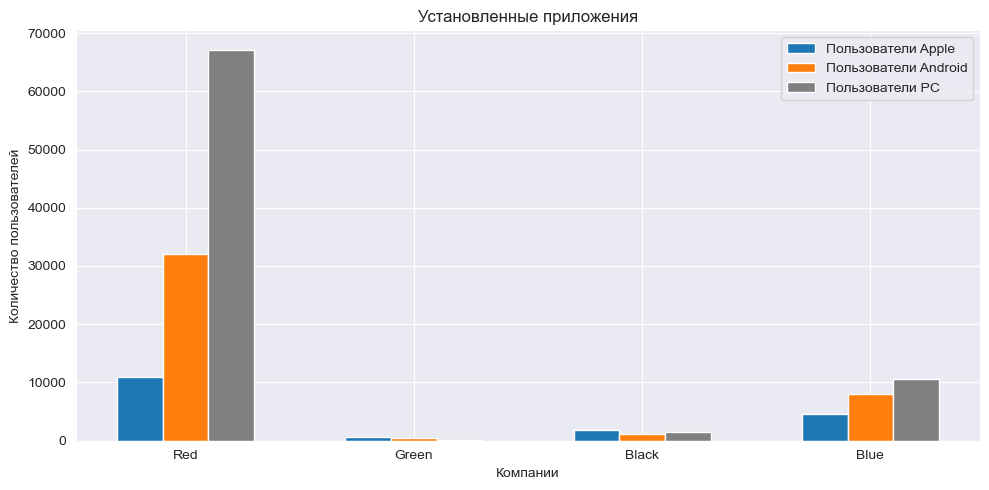

In [54]:
# Выведем график
draw_devices(df)

По получившимуся графику можно заметить, что преобладает количество пользователей в компании **Red**, хоть о ней нам известно меньше всего информации.\
Количество пользователей компании **Red** является почти в 5 раз больше, чем всех остальных компаний суммарно.
Самыми популярными компаниями по убыванию количества пользователей являются:
1. Red (110115 единицы зарегистрированных устройств)
2. Blue (23333 единицы)
3. Black (4320 единицы)
4. Green (1360 единицы)

Пользователи компаний **Red** и **Blue** преимущественно имеют десктопные приложения, в отличие от **Green** и **Black**, в которых пользователи чаще устанавливают приложения на систему Apple.

### 2.2 Распределение пользователей по устройствам (`draw_heatmap_devices`)

Построим тепловую карту, взяв за основу устройства пользователей: посмотрим, на каких устройствах пользователи чаще всего устанавливают приложения каждой из компаний.

In [55]:
def draw_heatmap_devices(data: pd.DataFrame) -> None:
    # Создадим списки со значениями для нашего хитмапа
    x_labels = ['Red', 'Blue', 'Green', 'Black']
    idx_cols = ['Apple only', 'Android only', 'PC only', 'Android + Apple', 'Apple + PC', 'Android + PC', 'All devices']

    # np.meshgrid - перебор всех заданных значений. Чтобы не писать 7 копий одного и того же
    mesh = np.array(np.meshgrid([1, 0], [0, 1], [0, 1])).T.reshape(-1,3)
    # Отбираем значения, которые мы перебрали в нужном порядке
    mesh = np.append([mesh[::3], mesh[1::3]], mesh[-3]).reshape(7, 3)
    # Создаём пустой датафрейм
    res = pd.DataFrame(np.arange(7), dtype=np.int16)

    # Добавляем значения об устройствах в датафрейм res
    for label in x_labels:
        res[label] = pd.DataFrame(
            [
                # Очень удобно выбирать колонки через f-строки,
                # когда они все приведены к единому формату
                data[(data[f'{label}_apple'] == mesh[x][0]) & 
                     (data[f'{label}_android'] == mesh[x][1]) & 
                     (data[f'{label}_web'] == mesh[x][2])].count().values[0] 
                for x in range(7)
            ]
        )

    # Снова устанавливаем индекс для красивого отображения, дропая пустой от создания
    res = res.set_index(pd.Index(idx_cols)).drop(0, axis=1)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1,1,1)
    # Тепловая карта из модуля seaborn
    sns.heatmap(res,
                cmap='cividis',  # Выберем палитру
                vmax=10000,      # Ограничим макс 10000, чтобы были более различимы маленькие значений
                annot=True,      # Выведем числовые значения на тайлы хитмапа
                fmt='n'          # Формат типа данных в тайлах
                )
    # Удалим датафрейм для экономии места
    del res
    
    # Установим параметры графика
    plt.title('Количество пользователей по установленным приложениям')
    plt.ylabel('Устройства')
    plt.xlabel('Компании')
    fig.tight_layout()
    plt.savefig('./output/draw_heatmap_devices.png')
    plt.show()

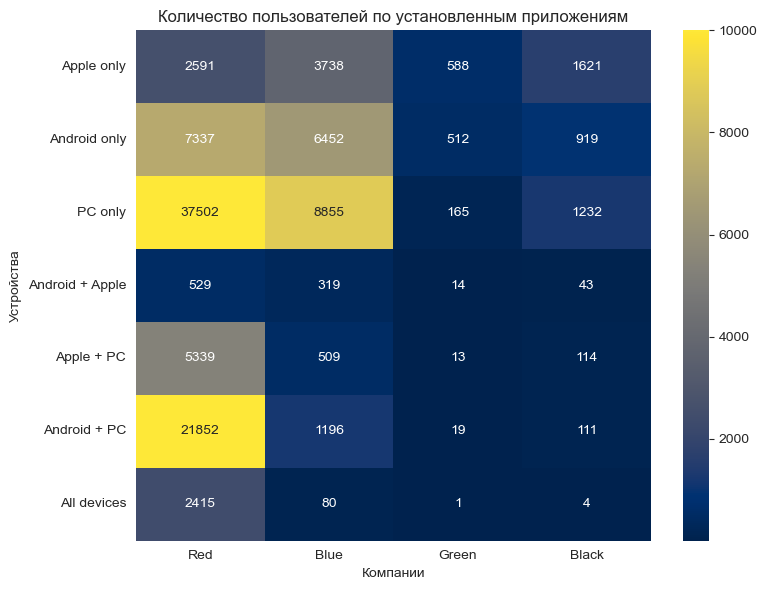

In [56]:
# Выведем наш хитмап
draw_heatmap_devices(df)

По данной тепловой карте можно заметить, что:
- Среди трёх отдельных систем пользователи зачастую предпочитают **PC** больше, нежели другие девайсы
- Несмотря на большую разницу в пользователях между компаниями **Blue** и **Red**, первая компания лишь немного отстаёт по количеству пользователей с мобильными девайсами
- Среди установок приложений на несколько устройств, комбинация **Android + PC** является наиболее популярной
- Крайне малое количество пользователей имеют приложения компаний на всех трёх устройствах
- Некоторые пользователи пользуются несколькими телефонами (**Android + Apple**)
- Наиболее популярные системы для каждой компании:
    - Red: PC
    - Blue: PC (с небольшим отрывом от Android)
    - Green: Apple (с крайне малым отрывом от Android)
    - Black: Apple (с крайне малым отрывом от PC)

Исходя из данных о самых популярных систем можно сделать вывод, что компания **Red** ориентируется на ПК-пользователей, в то время, как компания **Green** на мобильные приложения.

### 2.3 Количество активных пользователей

К сожалению, у нас имеется лишь одна колонка типа *company*_activity_count, поэтому проведём лишь её анализ.

Через отношение значений посмотрим на активное количество пользователей, которые совершили более 0, 10 или 100 действий в рамках компании **Blue**, а так же на количество пользователей, которые не совершили ни одного действия.

In [57]:
# Если активность пользователя равна нулю
print(f"Кол-во неактивных пользователей: {df[df['Blue_activity_count'] == 0].shape[0]}")

# Цикл перебора значений активности пользователей
# Решил взять 0, 10 и 50, т.к. мало кто будет заказывать на
# каком-то сервисе что-то более 50 раз, а 10 как средний показатель
for val in [0, 10, 50]:
    print(f"Кол-во активных действий (более {val}): {df[df['Blue_activity_count'] > val].shape[0]}")
    
print(f"\nПроцент активных бользователей: {(df[df['Blue_activity_count'] > 0].shape[0] / df[df['Blue_activity_count'] == 0].shape[0])*100:.3f}%")

Кол-во неактивных пользователей: 96112
Кол-во активных действий (более 0): 3887
Кол-во активных действий (более 10): 531
Кол-во активных действий (более 50): 28

Процент активных бользователей: 4.044%


Исходя из полученного результата, всего лишь `4.044%` всех пользователей компании **Blue** совершили хотя бы одно действие, и лишь 28 пользователей являются самыми активными в данной компании, совершив более 50 взаимодействий.

### 2.4 Количество пользователей из Москвы (`draw_msk_users`)

Имея данные колонок has_*company*_id для компаний **Green**, **Blue** и **Black**, построим графики зарегистрированных и незарегистрированных пользователей каждой из компаний. 

Имея информацию о месте проживания пользователя `is_msk` (в Москве или вне проживает пользователь), дополнительно построим графики, отталкиваясь от местоположения.

In [58]:
def draw_msk_users(data: pd.DataFrame) -> None:
    col_names = ['Green', 'Blue', 'Black']
    title = ['Зарегистрированные пользователи', 'Незарегистрированные пользователи']
    # Создадим пустой список, в который затем занесём значения
    # по проживанию и активности пользователей. Содержит лишь
    # две переменные, т.к. у нас цикл из 2 итераций, таким образом
    # избавляемся от определения дополнительной переменной
    reg = [0, 0]

    fig = plt.figure(figsize=(14, 5))
    
    for i, count in enumerate(reversed(range(2))):
        if i == 0:
            print('Зарегистрирован (в Москве / вне Москвы):')
        else:
            print('Не зарегистрирован (в Москве / вне Москвы):')
        
        ax = fig.add_subplot(1,2,i+1)
        
        for idx, val in enumerate(col_names):
            # Проверка на то, живёт ли наш пользователь в Москве
            # снова через f-строки
            in_msk = df[(df[f'has_{val}_id'] == count) & (df['is_msk'] == 1)].shape[0]
            out_msk = df[(df[f'has_{val}_id'] == count) & (df['is_msk'] == 0)].shape[0]
            
            # Как раз то использование списка по итерации
            reg[i] += in_msk + out_msk
            print(f'\t{val}: {in_msk / out_msk:.3f}')
            
            # Снова пример barchart через matplotlib.pyplot.bar
            plt.bar(idx - 0.2, in_msk, width=0.4, alpha=0.7, color='blue')
            plt.bar(idx + 0.2, out_msk, width=0.4, alpha=0.7, color='orange')
            
        # Установим параметры графиков
        plt.title(title[i])
        plt.xlabel("Компании")
        plt.ylabel("Количество пользователей")
        # Ограничим оба графика на 90000 по высоте, чтобы
        # сохранить пропорции как на левом, так и на правом
        plt.ylim(top=90000)
        plt.legend(['В Москве', 'Вне Москвы'])
        plt.xticks(np.arange(3), col_names)
        
    print(f'\nКоличество зарегистрированных: {reg[0]}')
    print(f'Количество незарегистрированных: {reg[1]}')
    print(f'Соотношение: {reg[0] * 100 / reg[1]:.3f}%')
    fig.tight_layout()
    plt.savefig('./output/draw_msk_users.png')
    plt.show()

Зарегистрирован (в Москве / вне Москвы):
	Green: 3.256
	Blue: 0.190
	Black: 0.566
Не зарегистрирован (в Москве / вне Москвы):
	Green: 0.128
	Blue: 0.127
	Black: 0.132

Количество зарегистрированных: 14704
Количество незарегистрированных: 284768
Соотношение: 5.164%


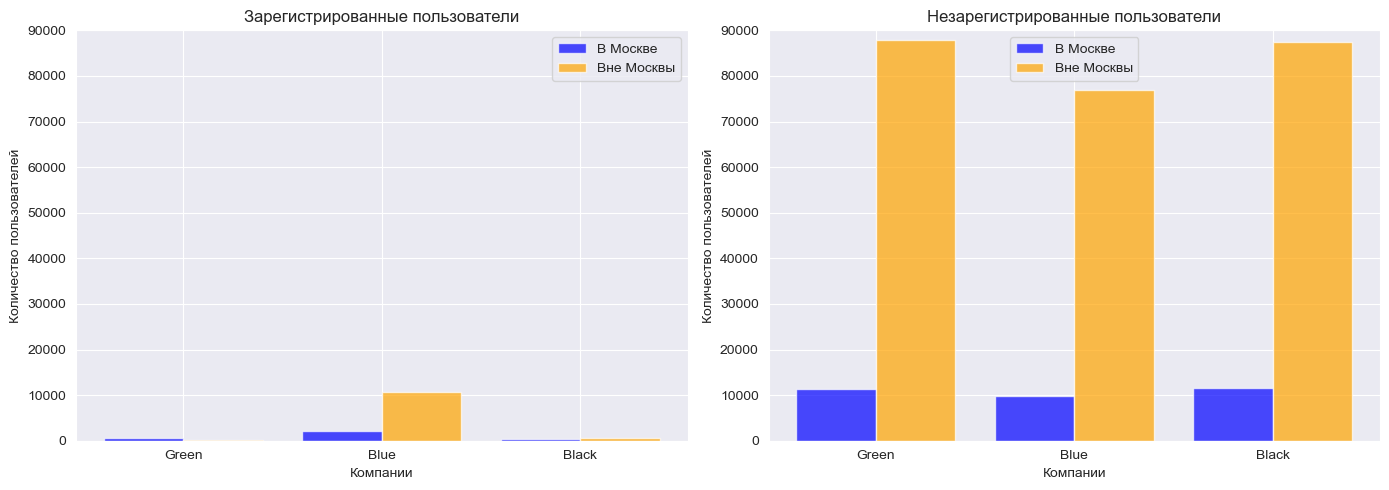

In [59]:
# Выведем графики
draw_msk_users(df)

По графикам видно, что:
- Количество **пользователей-москвичей** является крайне малым по отношению к иногородним.
- Общая доля зарегистрированных пользователей составляет лишь **5.164%**.
- В компании **Blue** количество зарегистрированных пользователей наибольшее.
- В компании **Green** с самым маленьким количеством пользователей, количество зарегистрированных пользователей из Москвы в **3,256** раза больше, чем москвичей без регистрации.

### 2.5 Корреляция устройств и наличий аккаунтов в компаниях (`draw_corr_heatmap`)

Сделаем тепловую карту корреляции между устройством и наличием аккаунта в каждой из компаний, чтобы посмотреть, существуют ли зависимости между использованием тех или иных устройств от регистрации в компаниях.

In [60]:
def draw_corr_heatmap(data: pd.DataFrame) -> None:
    # Значения по девайсам:
    # (*company*_android, *company*_apple и *company*_web соответственно)
    x = pd.concat([data.iloc[:, 10:18].T, data.iloc[:, 20:23].T], axis=0)
    # Значения по наличию зарегистрированного аккаунта
    y = pd.DataFrame(data.iloc[:, 1:4].values.T, index=data.iloc[:, 1:4].columns)
    labels = np.concatenate([x.index.values, y.index.values])

    fig = plt.figure(figsize=(10, 8))
    
    ax = fig.add_subplot(1,1,1)
    # Снова хитмап из seaborn
    sns.heatmap(
        np.corrcoef(x, y),    # Матрица коэффициентов корреляции
        vmin=-1,              # Принимает значения от -1
        vmax=1,               # До 1
        cmap='magma',         # Мой любимый cmap :)
        xticklabels=labels,
        yticklabels=labels,
        annot=True,           # Снова выведем числовые значения
        fmt='.2f'             # На этот раз во float с округлением,
    )                         # чтоб не перекрывало соседние ячейки
    
    # Установим параметры графика
    plt.title('Корреляционная связь между устройствами и наличием аккаунтов')
    fig.tight_layout()
    plt.savefig('./output/draw_corr_heatmap.png')
    plt.show()

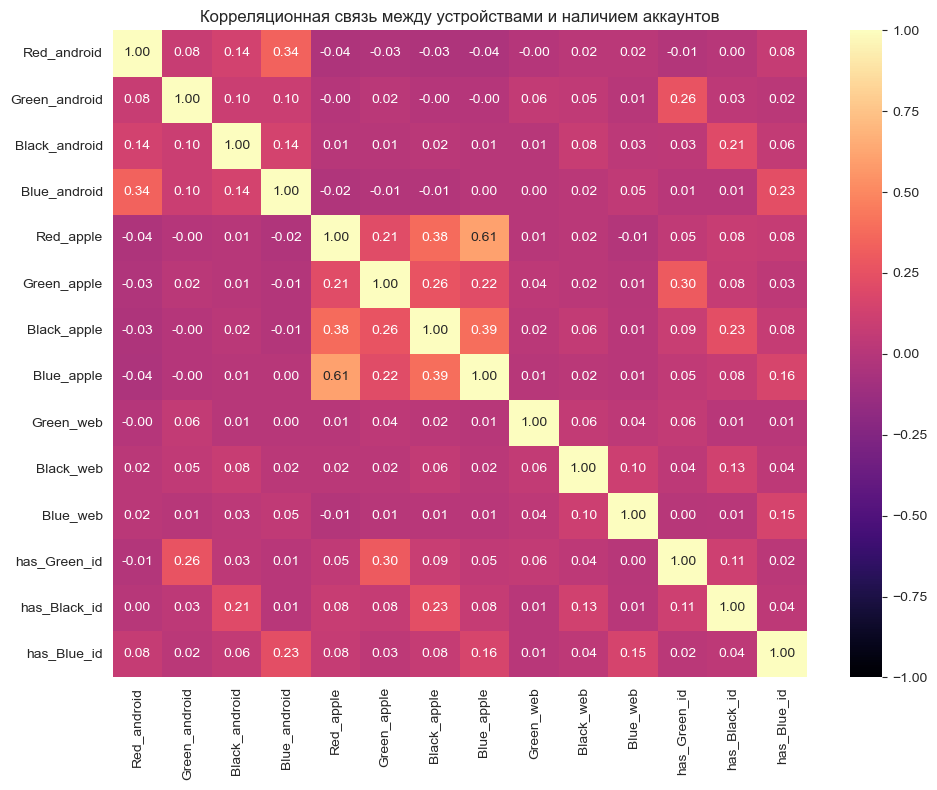

In [61]:
# Выведем хитмап
draw_corr_heatmap(df)

Глядя на эту карту, можно заметить:
1. Самый высокий коэффициент корреляции между `Red_apple` и `Blue_apple` = 0.61 (Высокая корреляция).\
Достаточно часто пользователи с устройствами Apple имеют приложения от обеих компаний - **Red** и **Blue**.
2. Корреляция между `Black_apple` почти одинакова с `Blue_apple` и `Red_apple` $\approx$ 0.39 (Средняя корреляция).\
Пользователи с мобильными девайсами от Apple иногда имеют приложения всех трёх компаний на своём устройстве.
3. Корреляция между `Blue_android` и `Red_android` равна 0.34 (Средняя корреляция).\
Пользователи с системой Android иногда имеют приложения сраху от двух компаний **Blue** и **Red**.
4. Корреляция `has_Green_id` схожа как с `Green_apple`, так и с `Green_android`, что лишь подтверждает результат [тепловой карты из пункта 2.2.](#22-распределение-пользователей-по-устройствам-draw_heatmap_devices)

# 3.0 GVM 📈

---

### 3.1 Графики GVM и цен (`draw_gvms`)

Отредактировав столбцы с GMV, можем приступить к их анализу. В датасете полные данные о GMV присутствуют лишь по компаниям **Green** и **Black**, поэтому займёмся анализом именно их.\
Как известно, GMV (Gross Merchandise Volume / Общий объём оборота товаров) - общая стоимость того, что было продано в определенный промежуток времени.\
Вычисляется по формуле:
$$GMV = \frac{\text{Количество покупок}}{\text{Средняя цена покупок}}$$
Для вычисления средней цены за купленный товар каждой из компаний, требуется поделить суммарный GMV на суммарное кол-во успешных заказов (`company_gmv_total / company_gmv_order_count`).

In [62]:
# Функция для получения суммарных GVM по колонкам
# для компаний Green и Black
def get_gmvs(data: pd.DataFrame) -> list[pd.DataFrame, pd.DataFrame]:
    col_names = ['Green', 'Black']
    # Пустой список для последующего джоина,
    # в котором хранятся датафреймы
    res = []
    
    # Проитерируемся по именам колонок
    for val in col_names:
        res.append(pd.concat(
            [
                # Снова конкатим все по именам колонок
                pd.DataFrame(df[df[f'{val}_gmv_total'] != 0][f'{val}_gmv_total']),
                pd.DataFrame(df[df[f'{val}_gmv_order_count'] != 0][f'{val}_gmv_order_count'])
            ],
            axis=1
        ))

    # Возвращаем джоин обоих датафреймов,
    # дропая несопоставленные значения
    return res[0].join(res[1], on='HID').dropna()

def draw_gmvs(data: pd.DataFrame) -> None:
    # Преобразуем наш датафрейм функцией выше
    data = get_gmvs(data)
    col_names = data.columns
    mean_col_names = ['Green', 'Black']
    titles = ['Общий объём продаж', 'Общее кол-во заказов', 'Средняя цена за товар']
    ylabels = ['Единицы валюты', 'Кол-во заказов', 'Единицы валюты']
    # Очередной список для хранения датафреймов для последующего конката
    res_list = []
    
    # Проитерируемся по датафреймам через 3, т.к. колонки хранятся в виде:
    #        1                   2                   3               4
    # Green_gvm_total, Green_gvm_order_count, Green_gvm_mean, Black_gvm_total...
    for i, val in enumerate(range(0, 3, 2)):
        res_list.append(pd.concat(
            [
                pd.DataFrame(data[col_names[val:val+2]].sum()).T,
                # Сразу находим среднюю цену за товар для каждой компании
                pd.DataFrame([data.iloc[:, val].sum() / data.iloc[:, val+1].sum()],columns=[f'{mean_col_names[i]}_gvm_mean'])
            ],
            axis=1
        ))
    # Конкатим полученные датафреймы
    res_list = pd.concat([res_list[0], res_list[1]], axis=1)
        
    fig = plt.figure(figsize=(12, 5))

    for idx in range(3):
        ax = fig.add_subplot(1,3,idx+1)
        # Пример barchart через seaborn
        # Снова конкатим через 3
        sns.barplot(pd.concat(
            [
                res_list.iloc[:, idx],
                res_list.iloc[:, idx+3]
            ], 
            axis=1)
        )
        
        # Добавим значения к нашим барам
        # Установим параметры графиков
        ax.bar_label(ax.containers[0])
        plt.title(titles[idx])
        plt.ylabel(ylabels[idx])
    # Удалим переменную для освобождения места
    del res_list
    
    fig.tight_layout()
    plt.savefig('./output/draw_gmvs.png')
    plt.show()

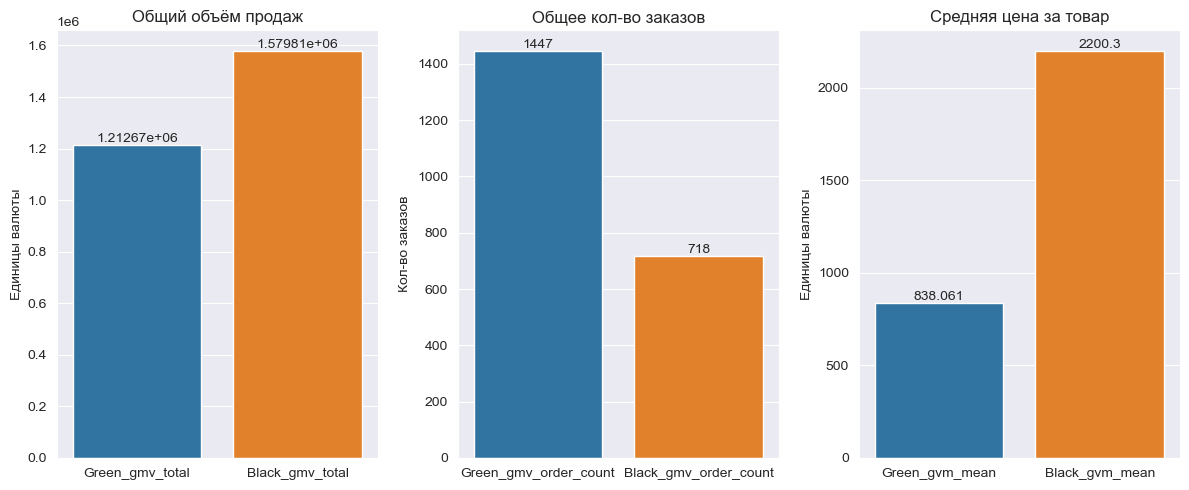

In [63]:
draw_gmvs(df)

Обратим внимание на зависимость меджу данными на столбчатых графиках и сделаем вывод:
+ Маржа компании **Black** явно значительно выше, чем у компании **Green**, так как средняя цена за товар первой практически в **`3`** раза превышает среднюю цену второй.
+ При этом, общее количество заказов у компании **Green** более, чем в **`2`** раза превышает количество заказов второй **Black**.
+ Это подкрепляется тем, что общий объём продаж компании **Black** почти на `25%` превышает эту же метрику у компании **Green**.

### 3.2 Графики метрики GVM (`draw_gvms_graphs`)

Построим графики по закупкам пользователей в обеих компаниях и посмотрим, когда начинаются различия в суммах закупок.

In [64]:
def draw_gvms_graphs(data: pd.DataFrame) -> None:
    # Снова преобразуем датафрейм
    res = get_gmvs(data)
    labels = ['Green', 'Black']
    
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(1,1,1)
    
    for idx, label in enumerate(labels):
        # Снова добавляем графики через f-строку, дополнительно
        # сортируя для нашего графика разности общих GVM по компаниям
        plt.plot(pd.DataFrame(res[f'{label}_gmv_total']).\
            sort_values(by=f'{label}_gmv_total').\
            set_index(np.arange(res.shape[0])),
            label=label,
            linewidth=3
        )
    # Освободим место
    del res
    
    # Установим параметры графиков
    plt.title('GMV пользователей компаний Green и Black')
    # Через аргумент matplotlib'a prop установим размер
    # нашей легенды побольше
    plt.legend(prop={'size': 16})
    plt.xlabel('Единицы валюты')
    plt.ylabel('Общая сумма закупок')
    fig.tight_layout()
    plt.savefig('./output/draw_gvms_graphs.png')
    plt.show()

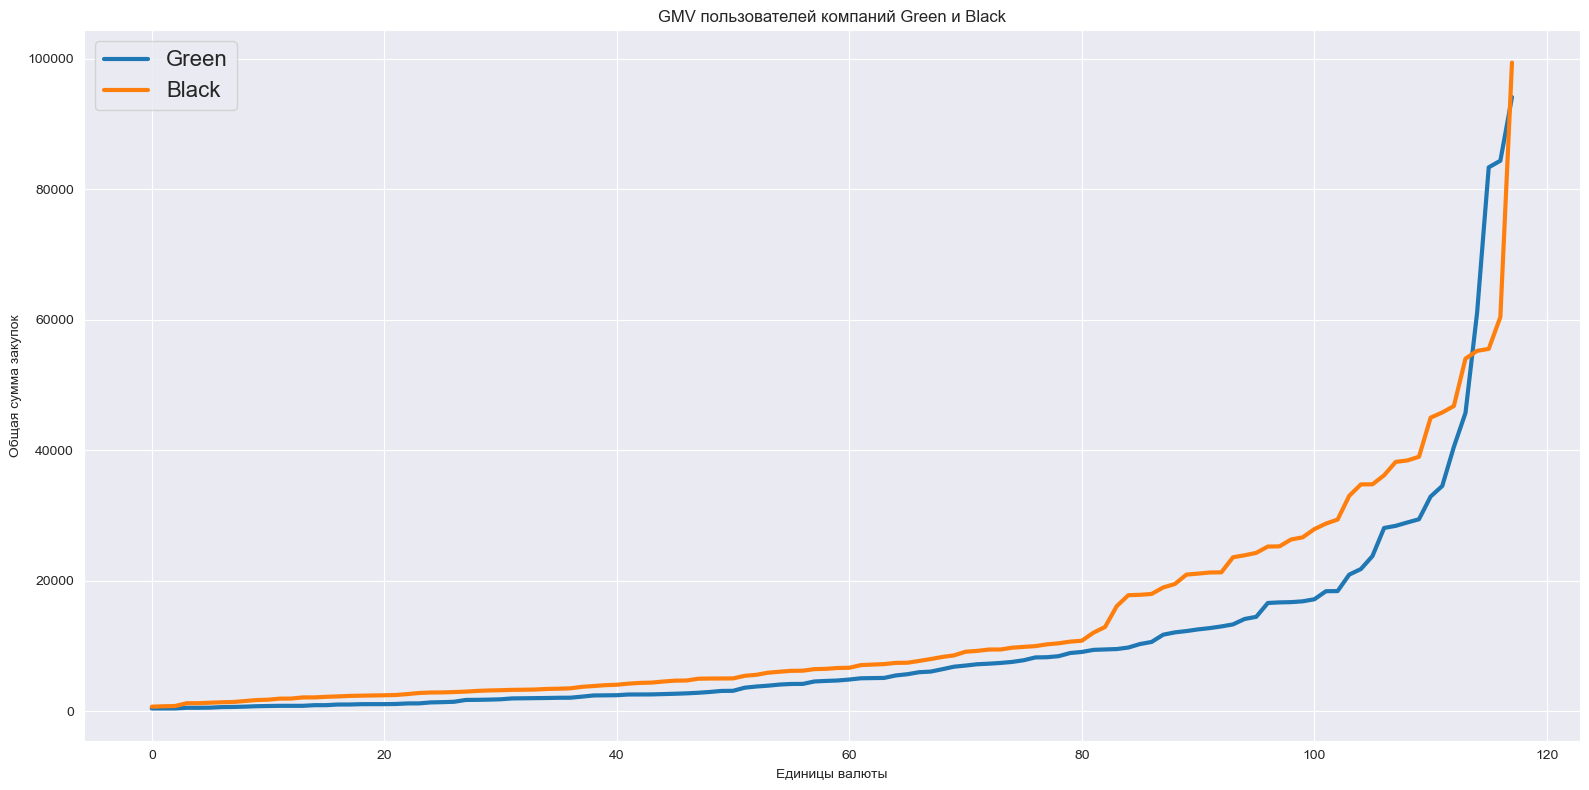

In [65]:
draw_gvms_graphs(df)

- Видим, что заметные расхождения начинаются с сумм закупок в районе $\approx$ 10.000 единиц валюты и длятся до $\approx$ 55.000 по общей сумме закупок пользователя. Именно в данном отрезке закупок компания **Black** обогнала компанию **Green** по глобальному **GMV**.
- Однако, после отметки в $\approx$ 55.000 GMV пользователей компании **Green** заметно превысило этот же показатель компании **Black** почти до самых больших суммарных объёмов закупок. 

### 3.3 Распределение данных

Построим гистограммы распределения данных в Z-шкале, проверим их на нормальность распределения для дальнейшего возможного анализа. Проведём скользящую среднюю для удобного отображения результата.

In [70]:
def draw_distributions(data: pd.DataFrame) -> None:
    # Установим сайд фигуры побольше, так как графиков
    # будет много
    fig = plt.figure(figsize=(20, 30))
    
    # Счётчик для номера графика    
    for val in range(23):
        ax = fig.add_subplot(8, 3, val + 1)
        # Гистограмма для наших распределений
        # Предварительно переводим всё в Z-шкалу, то есть 
        # нормализуем наши значения. Дополнительно добавляем 
        # kde, то есть скользящую среднюю
        sns.histplot(sp.stats.zscore(df.iloc[:, val]), kde=True)
        
        # Параметры каждого из графиков
        plt.title(df.iloc[:, val:val+1].columns.values[0])
        plt.xlabel('Z-score')
        plt.ylabel('Кол-во пользователей')     
            
    fig.tight_layout()
    plt.savefig('./output/draw_distributions.png')
    plt.show()

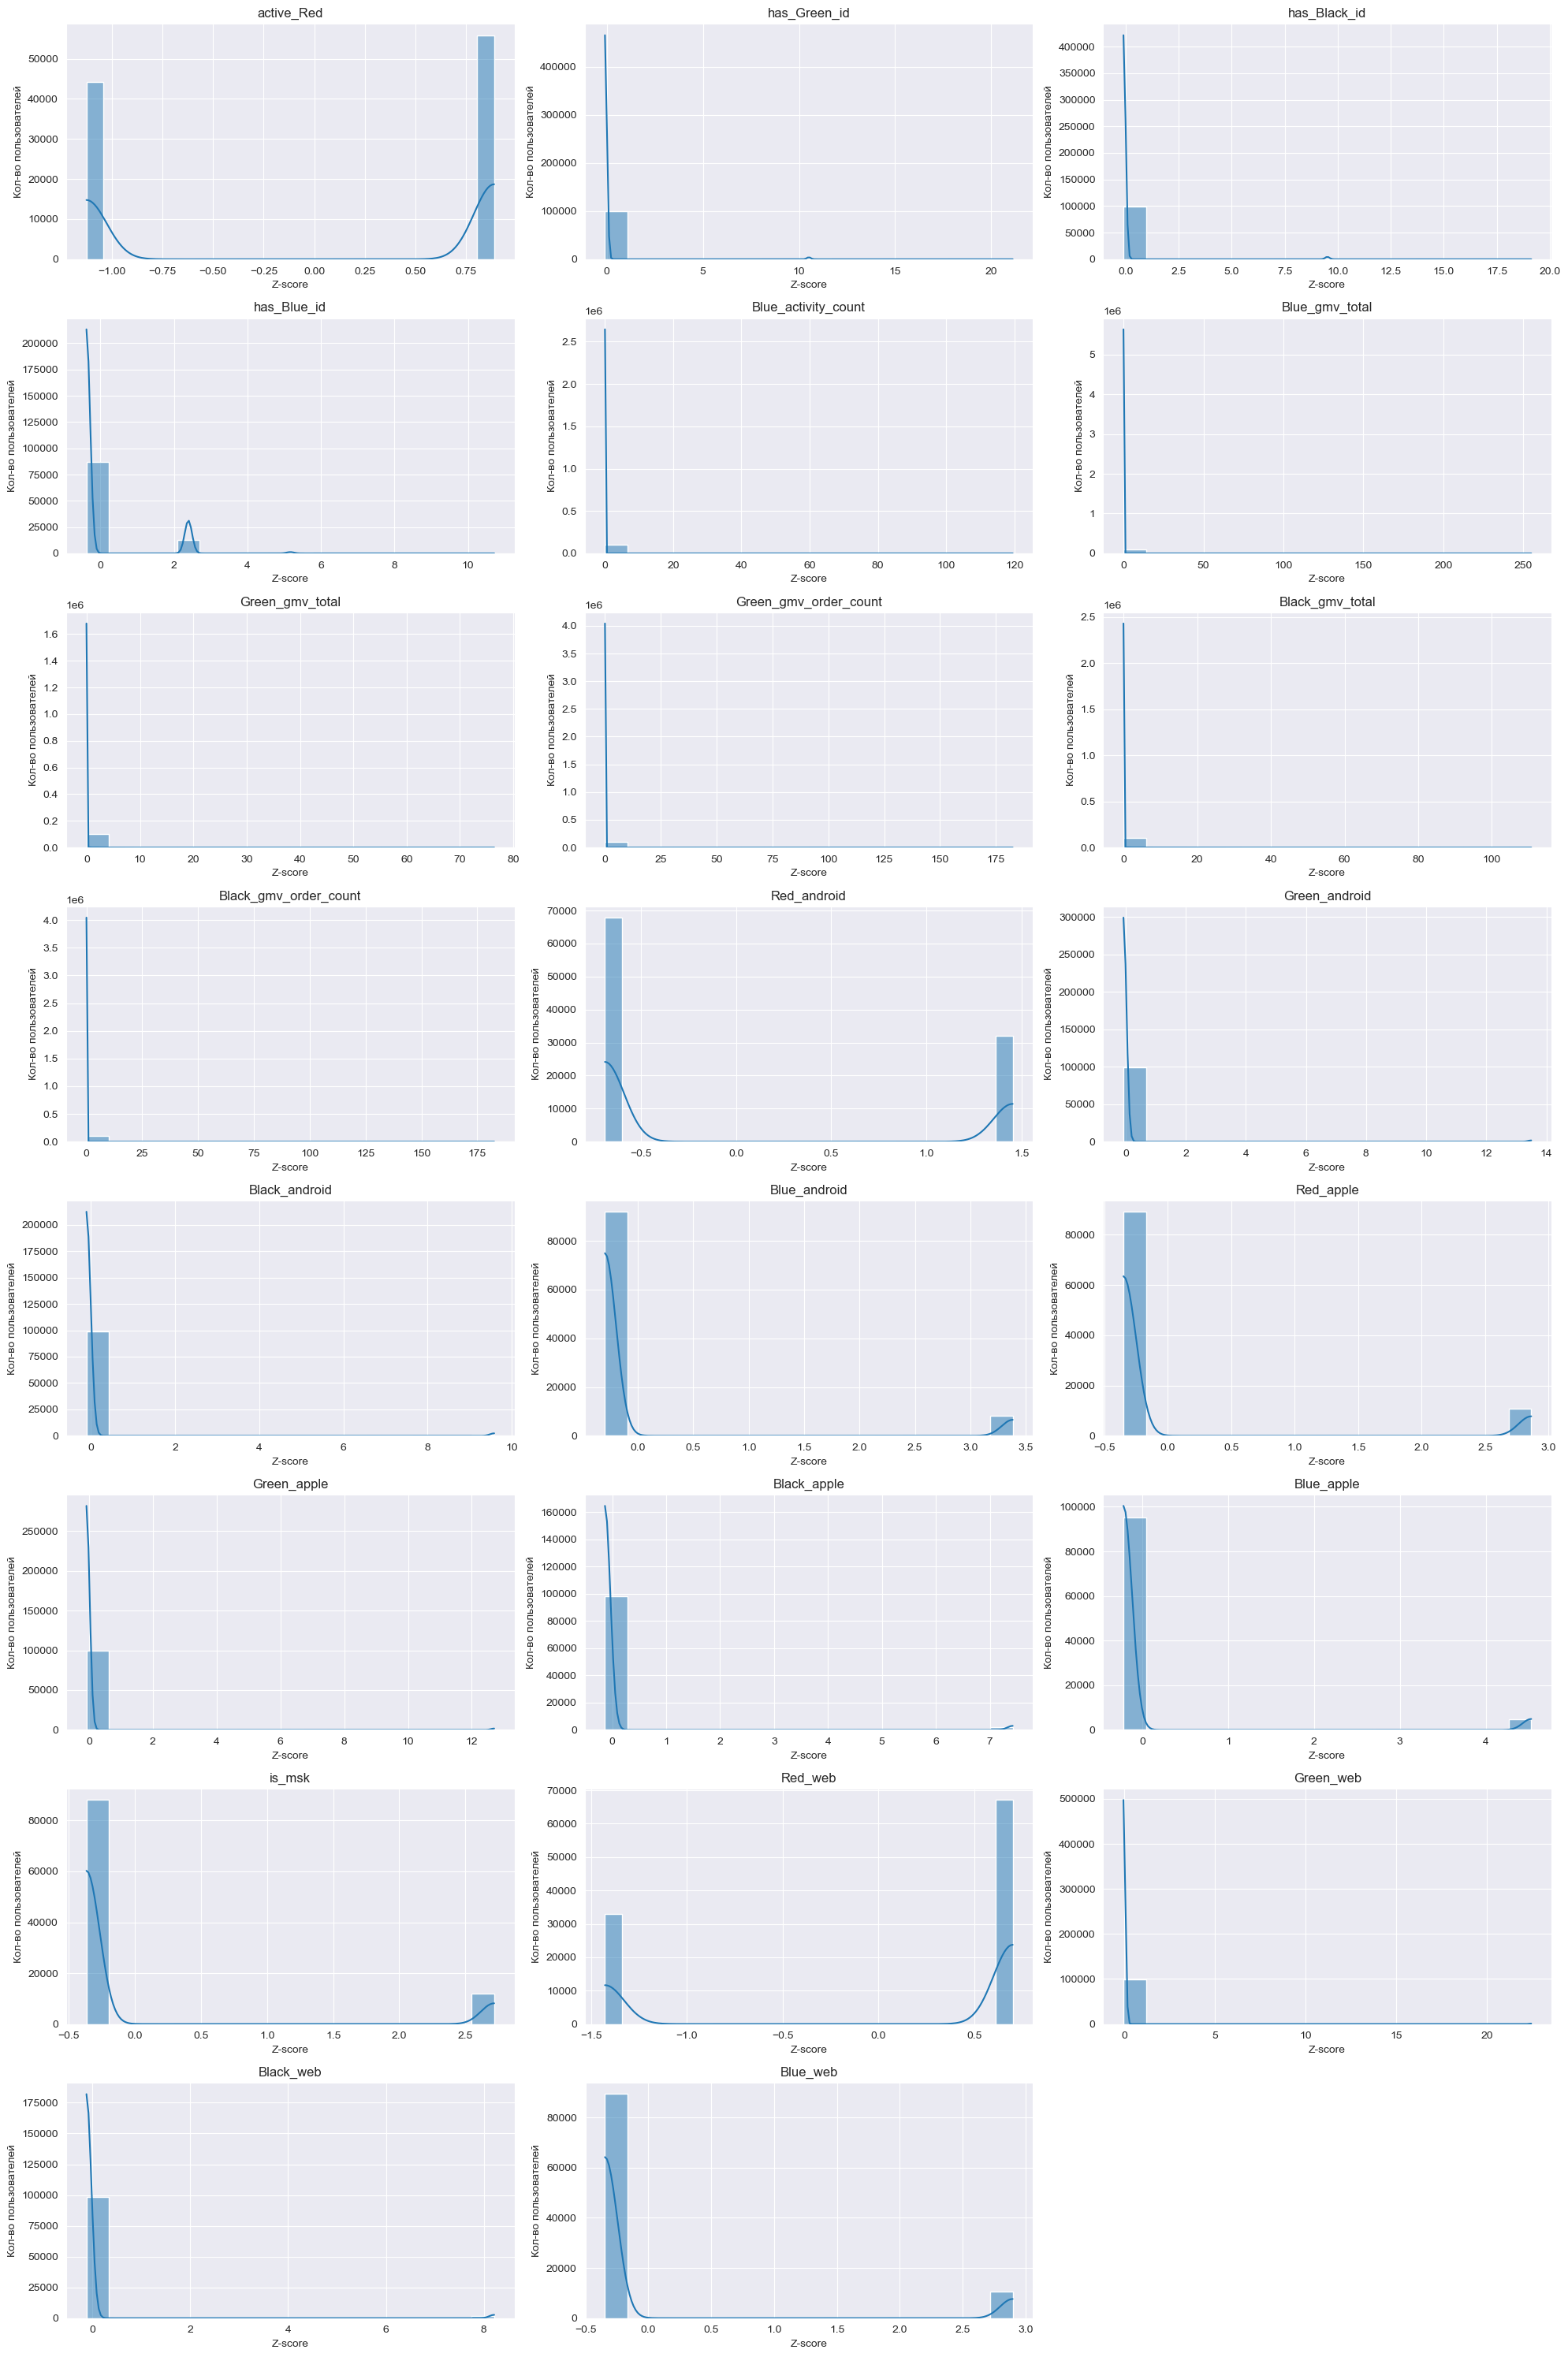

In [71]:
# Выводим таблицу графиков
draw_distributions(df)

Рассмотрев графики, можно убедиться, что, учитывая наши данные, ни один столбец не подходит под описание нормального распределения из-за огромного количества нулей в ячейках, а так же больших выбросов данных у некоторых пользователей. В связи с этим, мы не можем применить никакие тестирования из математической статистики, помимо средних, медиан или квантилей (персентилей), так как количество выбросов будет крайне велико.

# 4.0 Выводы ✅

---

### 4.1 Датасет

Изначально, датасет содержит в себе большое количество пропущенных колонок, что ограничивает возможности анализа.\
Самые важные недостающие колонки, которые повлияли на итоговый анализ:
- колонки, связанные с компанией **Red**, помимо устройств
- колонки с **GMV** по оставшимся двум компаниям
Так же, колонка *company*_activity_count была доступна лишь для компании **Blue**.
> Всего не хватает 7 значимых колонок с данными.

### 4.2 Пользователи

Данные по компаниям и значительно разнятся, особенно в плане зарегистрированных / незарегистрированных пользователей и количеству используемых устройств. Однако, графики устройств **Red** и **Blue** достаточно схожи в соотношении, так что можно предположить, что 
> Активность пользователей компании **Red** схожа компанией **Blue**, имея примерно 4-5% активных пользователей от общего числа.

Наиболее крупной компанией является компания **Red**, наименее крупной - **Green**.\
Среди всех систем пользователи зачастую предпочитают **PC** остальным устройствам, а 
> Компания **Red** опирается на систему **PC** в плане доступа пользователей.

Компании имеют крайне малое количество пользователей-москвичей, при этом
> Количество зарегистрированных пользователей составляет лишь *5.164%* от общего числа.

Количество пользователей из Москвы сильно проигрывает количеству пользователей вне её.
> Компания **Green**, скорее всего, расположена в Москве, так как имеет значительную долю зарегистрированных пользователей из столицы.

Пользователи устройств Apple достаточно часто имеют приложения компаний **Blue** и **Red** одновременно, а
> Иногда, на устройствах Apple у пользователей установлены приложения сразу от трёх компаний: **Blue**, **Red** и **Black**

### 4.3 GMV

Общее количество заказов пользователей у компании **Green** в **2** раза выше, чем у компании **Black**, а также общий объём продаж первой компании уступает второй более, чем на на **25%**. Можно сделать вывод, что
> Маржинальность компании **Black** значительно выше, чем компании **Green**.

Заметные различия в закупках проявляются лишь начиная от $\approx$ 10.000 единиц валюты суммарного GMV пользователя, что говорит о более дорогих закупках в компании **Black**.

Распределение данных ни по одной из колонок <ins>не</ins> является нормальным.